# ****House price prediction using machine learning in python****

# Step 1: Importing Libraries and Dataset

In [23]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt #visulaization
import seaborn as sns #corelation bw features

dataset = pd.read_excel("HousePricePrediction.xlsx")
print(dataset.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [25]:
dataset.shape #for dimentions
#the dataset contains 2919 rows and 13 cols

(2919, 13)

# Step 2: Data Preprocessing

In [21]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [27]:
# Categorical columns (text data)
obj_cols = dataset.select_dtypes(include = 'object').columns.tolist()
print("Number of catogorical variables",len(obj_cols))

# Integer columns (whole numbers)
int_cols = dataset.select_dtypes(include = 'int').columns.tolist()
print("Number of integer variables",len(int_cols))

# Float columns(float numbers)
float_cols = dataset.select_dtypes(include = 'float').columns.tolist()
print("Number of float variables",len(float_cols))

Number of catogorical variables 4
Number of integer variables 6
Number of float variables 3


# Step 3: Exploratory data analysis

<Axes: >

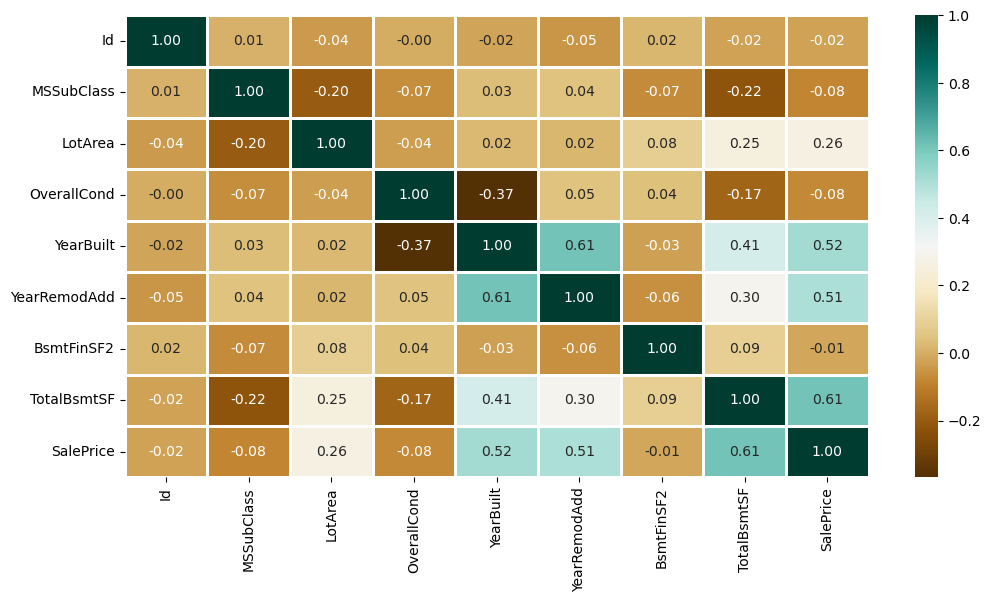

In [29]:
numerical_dataset = dataset.select_dtypes(include = "number")

plt.figure(figsize = (12,6))
sns.heatmap(numerical_dataset.corr(),
           cmap = "BrBG",
           fmt = '.2f',
           linewidths = 2,
           annot = True)

<Axes: title={'center': 'Number of unique values of catgorical features'}>

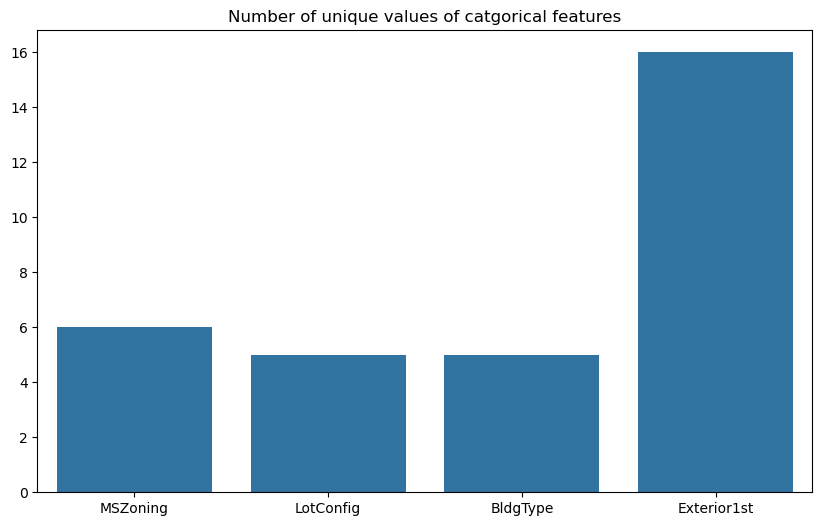

In [17]:
#Analyze catogerical values
unique_values = []
for col in obj_cols:
    unique_values.append(dataset[col].unique().size)
#print(unique_values)

plt.figure(figsize = (10,6))
plt.title("Number of unique values of catgorical features")
sns.barplot(x = obj_cols,y = unique_values)

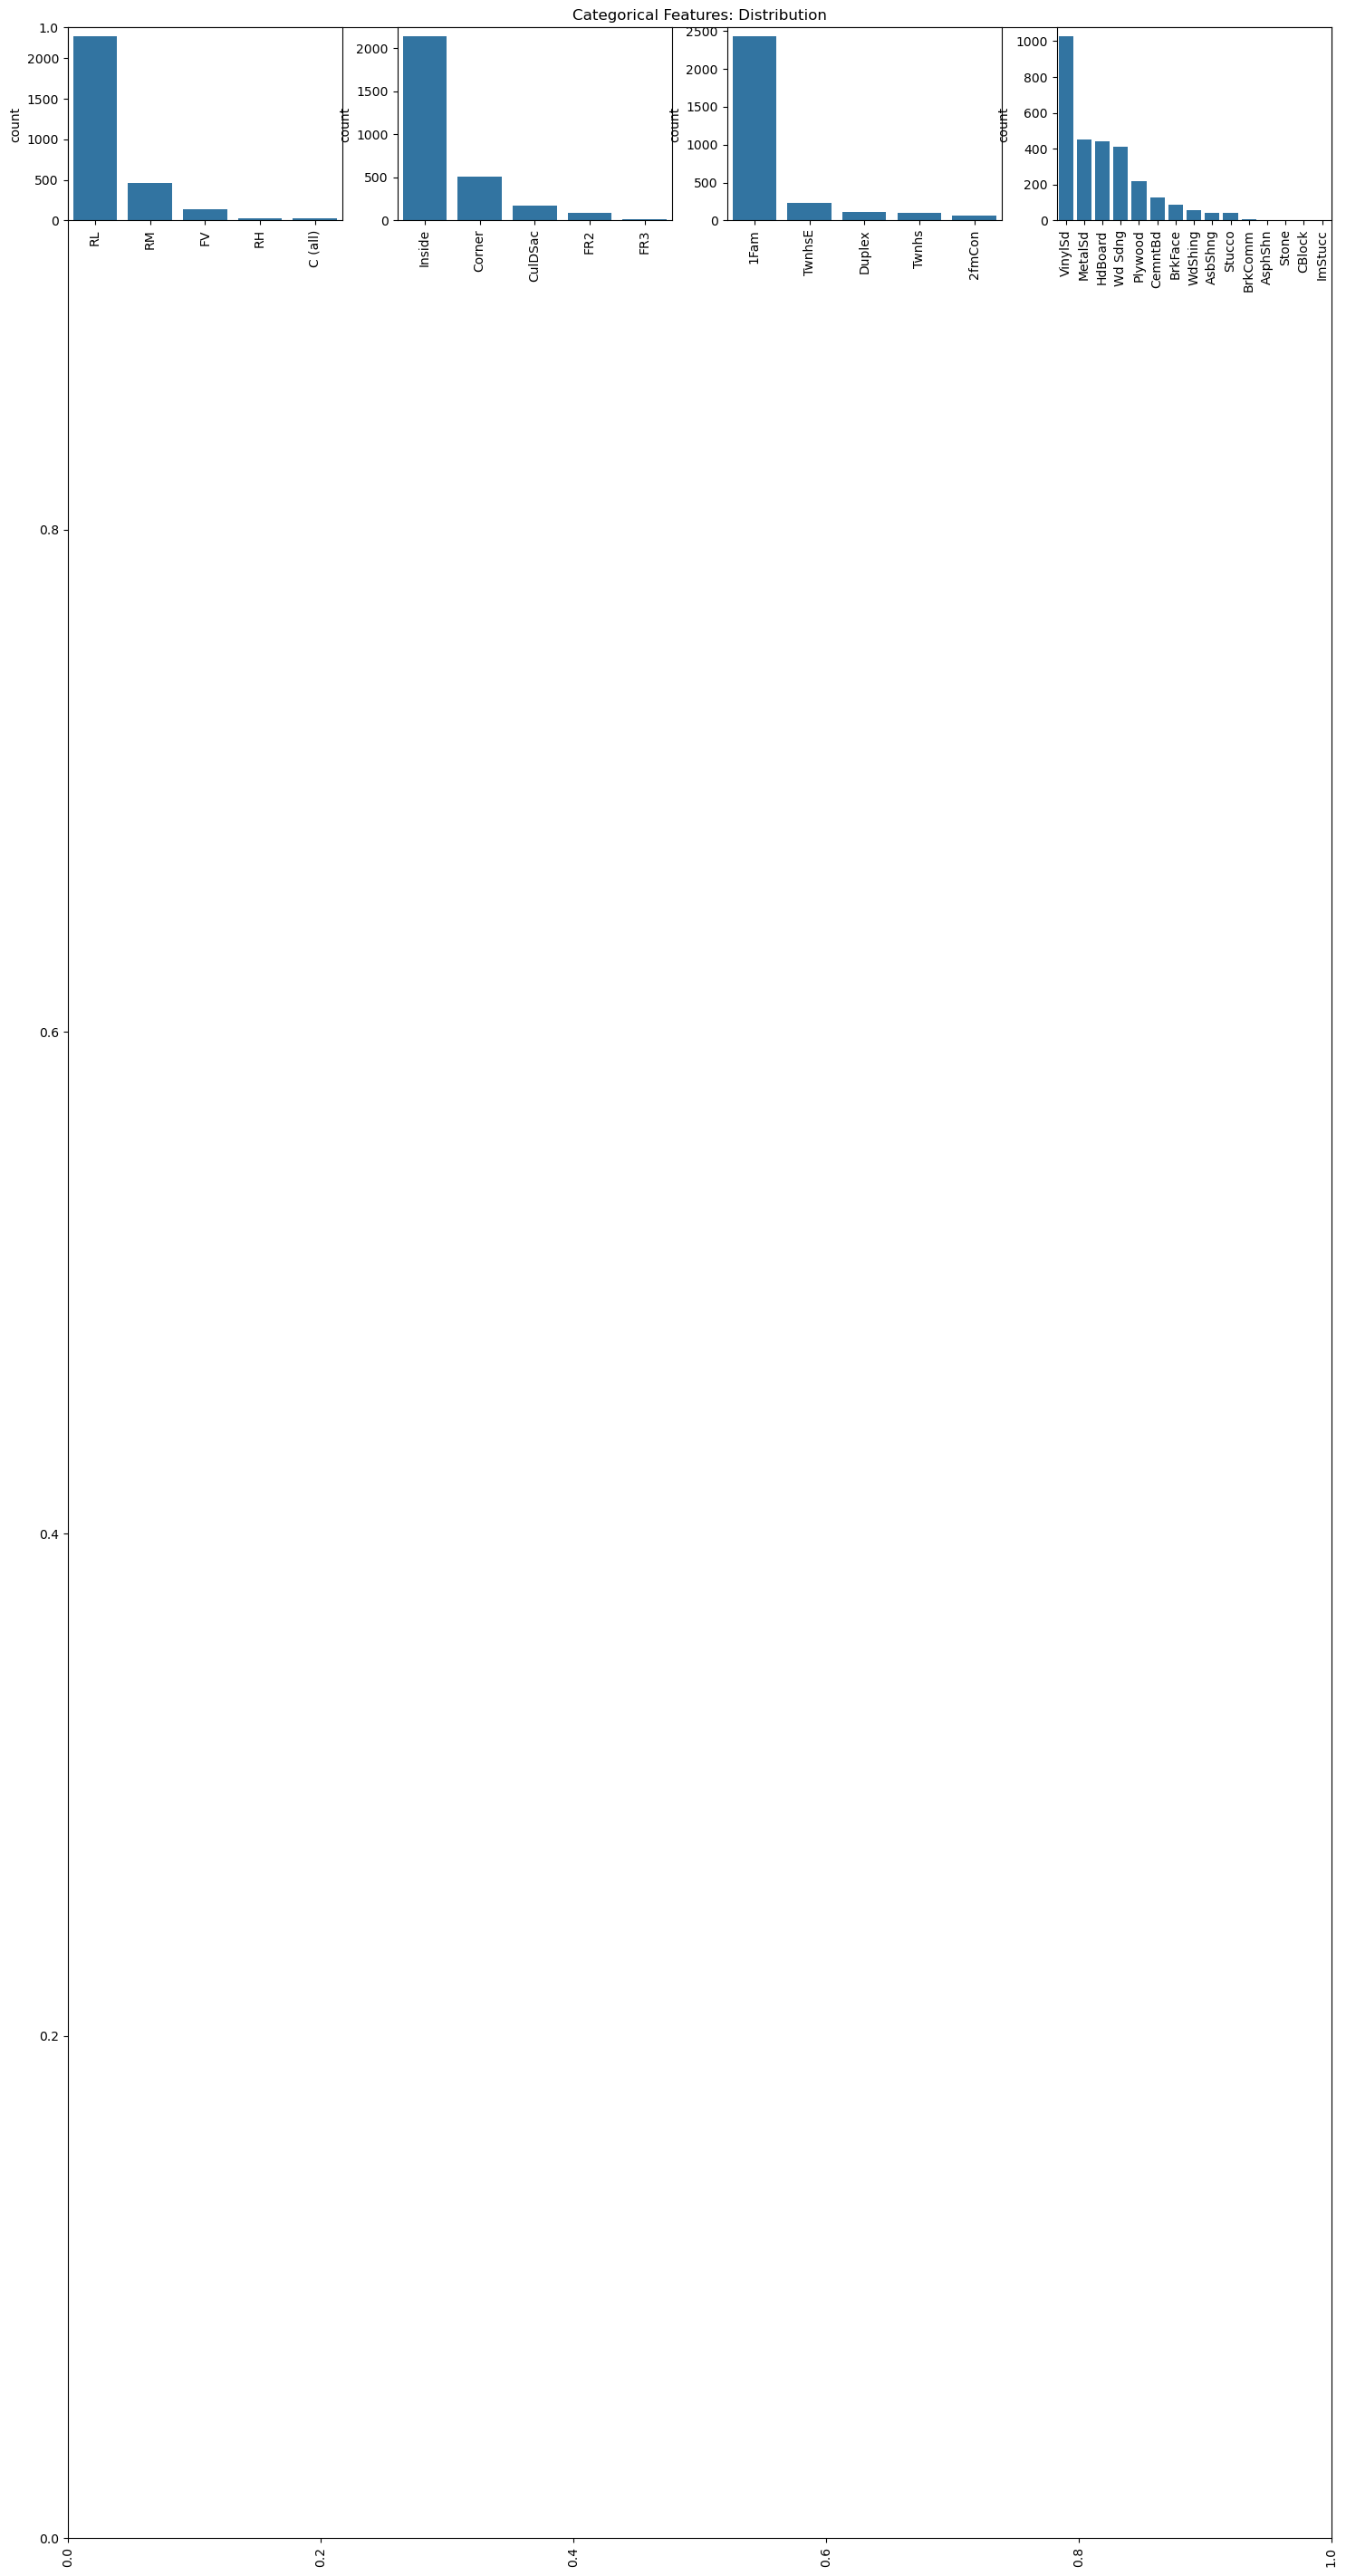

In [35]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in obj_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

# Step 4: Data cleaning

In [37]:
# drop the column id
dataset.drop(['Id'],axis = 1,inplace = True)

In [39]:
#fill the missing values in price column with the mean
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [41]:
#drop the rows which contains null values
new_dataset = dataset.dropna()

In [43]:
#check null values in new dataframe
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# Step 5: OneHotEncoder - For Label categorical features

In [45]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
obj_cols = list(s[s].index)
print("Categorical variables:")
print(obj_cols)
print('No. of. categorical features: ', 
      len(obj_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [47]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[obj_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(obj_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Step 6: Splitting Dataset into Training and Testing

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'],axis =1)
Y = df_final['SalePrice']

X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,train_size = 0.8, test_size = 0.2,random_state = 0
)

# Step 7: Model Training and Accuracy

In [51]:
#Support vector Machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))

0.1870512931870423


In [53]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))

0.19100744973317846


In [55]:
#Linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))

0.18741683841600051
